<a href="https://colab.research.google.com/github/hudamohmand/project-1-mortality/blob/main/project_1_bsds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 1 - Adalia, Huda, Betanya, Khalid, Eliab, Musa

The goal of the first project is to do some wrangling, EDA, and visualization, and generate sequences of values. We will focus on:

- CDC National Health and Nutritional Examination Survey (NHANES, 1999-2000): https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=1999
- CDC Linked Mortality File (LMF, 1999-2000): https://www.cdc.gov/nchs/data-linkage/mortality-public.htm

NHANES is a rich panel dataset on health and behavior, collected bi-yearly from around 1999 to now. We will focus on the 1999 wave, because that has the largest follow-up window, providing us with the richest mortality data. The mortality data is provided by the CDC Linked Mortality File.

The purpose of the project is to use $k$-NN to predict who dies (hard or soft classification) and how long they live (regression).

### Part 1: Wrangling and EDA (40/100 pts)

First, go to the NHANES and LMF web sites and familiarize yourself with the data sources. Download codebooks. Think about what resources are available. The CDC Linked Mortality File is somewhat of a pain to work with, so I have pre-cleaned it for you. It is available at httts://github.com/ds4e/undergraduate_ml_assignments in the data folder, as `lmf_parsed.cav`. From the CDC LMF web page, get the SAS program to load the data; it is the real codebook.

Second, download the demographic data for the 1999--2000 wave from the NHANES page. You can use the following code chunk to merge the LMF and DEMO data:

``` python
import pandas as pd
mdf = pd.read_csv('linked_mortality_file_1999_2000.csv') # Load mortality file
print( mdf.head() )
gdf = pd.read_sas("DEMO.xpt", format="xport") # Load demographics file
print( gdf.head() )
df = gdf.merge(mdf, on="SEQN", how="inner") # Merge mortality and demographics on SEQN variable
```

Third, the variables `ELIGSTAT`, `MORTSTAT`, `PERMTH_INT`, and `RIDAGEEX` are particularly important. Look them up in the documentation and clearly describe them. (5/100 pts.)

**Answer:**

`ELIGSTAT` -  Eligibility Status for Mortality Follow-Up

Shows whether a respondent could be linked to the National Death Index for mortality tracking. 1 = Eligible adult, 2 = Under 18, 3 = Otherwise ineligible. We only keep ELIGSTAT == 1 since the other groups don't have usable mortality data.

`MORTSTAT` - Final Mortality Status

Binary variable indicating whether someone died by the end of follow-up (2019). 0 = assumed alive, 1 = confirmed dead. This is our classification target. Worth noting that 0 doesn't guarantee they're alive — the NDI linkage can miss some deaths, so there's a little built-in noise.

`PERMTH_INT` - Person-Months of Follow-Up

Counts the months between the NHANES interview and either death or the end of the study window. For people who died, this tells us roughly how long they lived after the survey. For survivors it's censored — we just know they made it at least that far. This is our regression target.

`RIDAGEEX` - Age at Examination

Age at the time of the physical exam, stored in months rather than years (divide by 12 to convert). Age is probably the single strongest predictor of mortality in this dataset, so it'll likely end up doing a lot of the heavy lifting in our k-NN model.

--


Second, the goal of the project is to use whatever demographic, behavioral, and health data you like to predict mortality (`MORTSTAT`) and life expectancy (`PERMTH_INT`). Go to the NHANES 1999--2000 web page and select your data and download it. Clearly explain your rationale for selecting these data. Use `.merge` to combine your data into one complete dataframe. Document missing values. (5/100 pts)

**Answer:** In addition to demographic information, we selected blood pressure examination data and immunization questionnaire data from the NHANES 1999–2000 survey to help predict mortality status (MORTSTAT) and survival time (PERMTH_INT). We decided to use these datasets because we believe they showcase important aspects of healthcare behavior which correlates strongly with long-term health outcomes and mortality status and survival time. The blood pressure dataset was included because it is a big factor for diseases, strokes, and other health conditions. Immunization was chosen because we believe it may reflect how aware individual's are of their health and it will showcase if any precautions were taken when predicting life expectancy.

--


Third, do basic EDA and visualization of the key variables. Are any important variables skewed? Are there outliers? How correlated are pairs of variables? Do pairs of categorical variables exhibit interesting patterns in contingency tables? Provide a clear discussion and examination of the data and the variables you are interested in using. (20/100 pts)

**Answer:**

Visualization 1)

Visualization 2)

Visualization 3)

Visualization 4)

Visualization 5) IMQ020 - Ever Recieved Hepatitis A Vaccine: This bar graph shows a highly skewed distribution. A large proportion, about 52.5% of individuals were reported as being unsure on whether they has received the Hepatitis A vaccine, alongside that, 32.8% reported yes they had gotten the vaccine and 7.9% said no they had not. Additionally, 6.7% of the data was missing, which could mean some did not provide an answer or were not asked this specific question. Since it is a categorical variable, there are not outliers. This variable is also correlated with the Hepatitis B graph, and the Flu Shot graph. An interesting pattern these caegorical variables showcase is having majority unsure/missing percentages. This could be due to the controversy around vaccines, which makes it a bit difficult to connect mortality outcomes with getting vaccines.

Visualization 6) IMQ030 - Flu Shot in the Past 12 Months: This distribution is quite skewed with majority of the data (53.0%) consisting of missing responses. Outliers are not applicable because this variable is categorical. In contingency table analysis with mortality status, vaccination can provide us with meaningful patterns related to healthcare acces, knowledge, underlying health conditions or more. This variable can provide us with this meaningful insight however, it is essential to carefully interpret it due to the high proportion of missing data.


### Part 2: $k$-NN classification/regression, write-up (50/100 pts)

Submit a notebook that clearly addresses the following, using code and markdown chunks:

1. Describe the data, particularly what an observation is and whether there are any missing data that might impact your analysis. Who collected the data and why? What known limitations are there to analysis? (10/100 pts)
2. Describe the variables you selected to predict mortality and life expectancy, and the rationale behind them. Analyze your variables using describe tables, kernel densities, scatter plots, and conditional kernel densities. Are there any patterns of interest to notice? (10/100 pts)
3. Using your variables to predict mortality using a $k$-Nearest Neighbor Classifier. Analyze its performance and explain clearly how you select $k$. (10/100 pts)
4. Using your variables to predict life expectancy using a $k$-Nearest Neighbor Regressor. Analyze its performance and explain clearly how you select $k$. (10/100 pts)
5. Describe how your model could be used for health interventions based on patient characteristics. Are there any limitations or risks to consider? (10/100 pts)

## Submission (10/100 pts)

Submit your work in a well-organized GitHub repo, where the code is appropriately commented and all members of the group have made significant contributions to the commit history. (10/100 pts)

In [ ]:
import pandas as pd
mdf = pd.read_csv('linked_mortality_file_1999_2000.csv') # Load mortality file
print( mdf.head() )
gdf = pd.read_sas("DEMO.xpt", format="xport") # Load demographics file
print( gdf.head() )
df = gdf.merge(mdf, on="SEQN", how="inner") # Merge mortality and demographics on SEQN variable

   SEQN  ELIGSTAT  MORTSTAT  UCOD_LEADING  DIABETES  HYPERTEN  PERMTH_INT  \
0     1         2       NaN           NaN       NaN       NaN         NaN   
1     2         1       1.0           6.0       0.0       0.0       177.0   
2     3         2       NaN           NaN       NaN       NaN         NaN   
3     4         2       NaN           NaN       NaN       NaN         NaN   
4     5         1       0.0           NaN       NaN       NaN       244.0   

   PERMTH_EXM  
0         NaN  
1       177.0  
2         NaN  
3         NaN  
4       244.0  
   SEQN  SDDSRVYR  RIDSTATR  RIDEXMON  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDAGEEX  \
0   1.0       1.0       2.0       2.0       2.0       2.0      29.0      31.0   
1   2.0       1.0       2.0       2.0       1.0      77.0     926.0     926.0   
2   3.0       1.0       2.0       1.0       2.0      10.0     125.0     126.0   
3   4.0       1.0       2.0       2.0       1.0       1.0      22.0      23.0   
4   5.0       1.0       2.0       2.

In [ ]:
#Question 2 code
import pandas as pd

# Load BPX (blood pressure) dataset
bpx = pd.read_sas('BPX.xpt', format='xport')
print(bpx.head())

# Load IMQ (immunization) dataset
imq = pd.read_sas('IMQ.xpt', format='xport')
print(imq.head())

# Merge BPX and IMQ on SEQN
df = bpx.merge(imq, on='SEQN', how='inner')
print(df.head())

   SEQN  PEASCST1  PEASCTM1      PEASCCT1  BPXCHR  BPQ150A  BPQ150B  BPQ150C  \
0   1.0       1.0     151.0  5.397605e-79   110.0      NaN      NaN      NaN   
1   2.0       1.0     764.0  5.397605e-79     NaN      2.0      2.0      2.0   
2   3.0       1.0     571.0  5.397605e-79     NaN      2.0      2.0      2.0   
3   4.0       1.0      47.0  5.397605e-79   108.0      NaN      NaN      NaN   
4   5.0       1.0     694.0  5.397605e-79     NaN      2.0      2.0      2.0   

   BPQ150D  BPAARM  ...  BPXDI2  BPAEN2  BPXSY3  BPXDI3  BPAEN3  BPXSY4  \
0      NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1      2.0     1.0  ...    56.0     2.0    98.0    56.0     2.0     NaN   
2      2.0     1.0  ...    64.0     2.0   112.0    62.0     2.0     NaN   
3      NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4      2.0     1.0  ...    84.0     2.0   122.0    82.0     2.0     NaN   

   BPXDI4  BPAEN4  BPXSAR  BPXDAR  
0     NaN     NaN     NaN     Na

In [ ]:
#Check dataset size
print("Shape of merged dataset:", df.shape)

Shape of merged dataset: (9282, 33)


In [ ]:
#Make a Clean Table
missing_table = pd.DataFrame({
    "Missing Count": df.isna().sum(),
    "Percent Missing": (df.isna().sum() / len(df)) * 100
})

missing_table = missing_table[missing_table["Missing Count"] > 0]
missing_table.sort_values("Percent Missing", ascending=False)

,Missing Count,Percent Missing
BPXDB,9225,99.385908
BPXSY4,7639,82.299073
BPXDI4,7639,82.299073
BPXCHR,7538,81.210946
BPAEN4,7146,76.987718
IMQ030,4840,52.143934
BPXDI3,3027,32.611506
BPXSY3,3026,32.600733
BPXDI2,2914,31.394096
BPXSY2,2914,31.394096


Missing Data Documentation:

After merging the BPX (Blood Pressure) and IMQ (Immunization) datasets using an inner join on SEQN, I examined missing values across all variables.
Several variables contain missing observations. The missingness in BPX variables likely occurs because not all participants completed the physical examination where blood pressure was measured. Similarly, IMQ variables may have missing data due to age restrictions or nonresponse to specific immunization questions.
The percentage of missing values varies across variables. Variables with very high missingness may need to be removed or carefully handled before modeling to avoid bias.
Overall, the missing data appears to result from survey design and participant nonresponse rather than data entry errors.

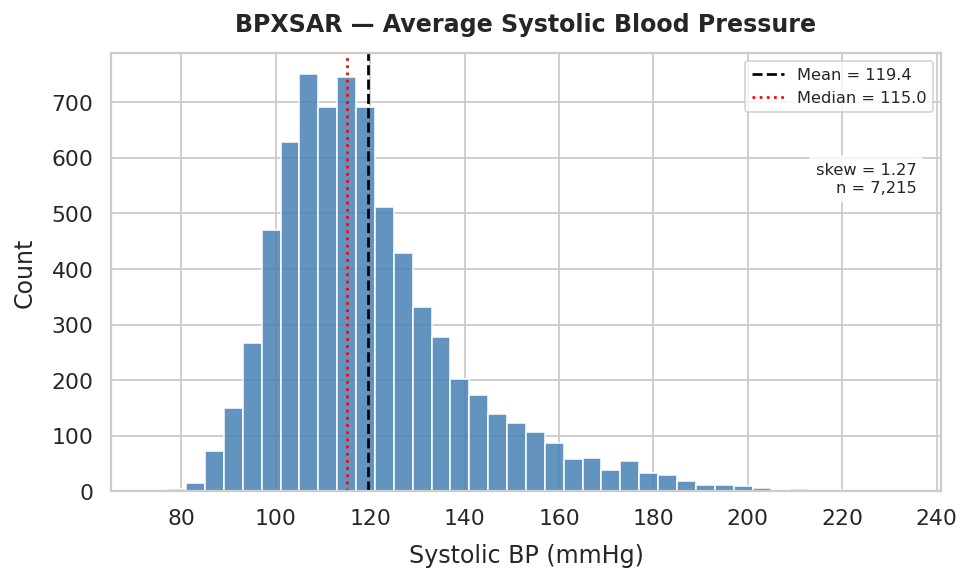

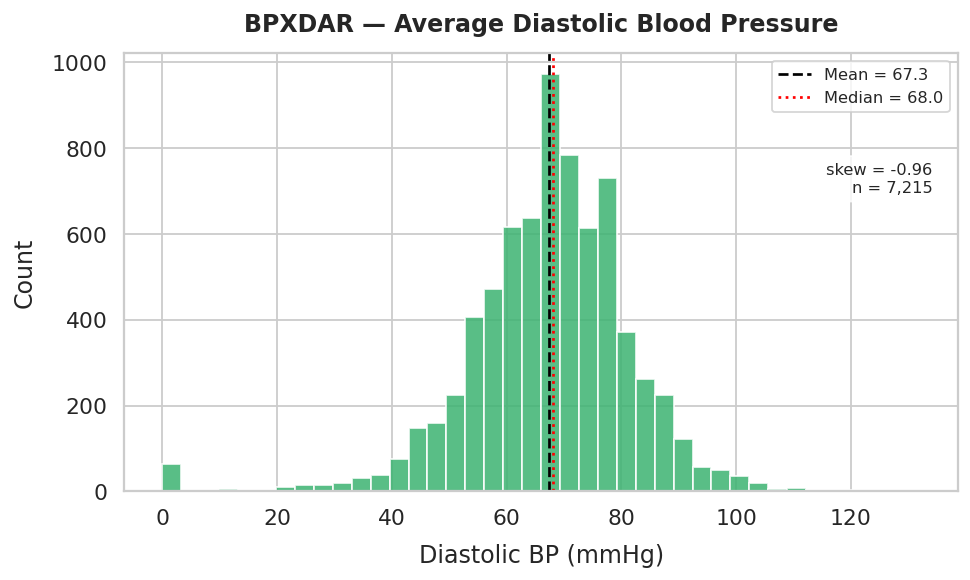

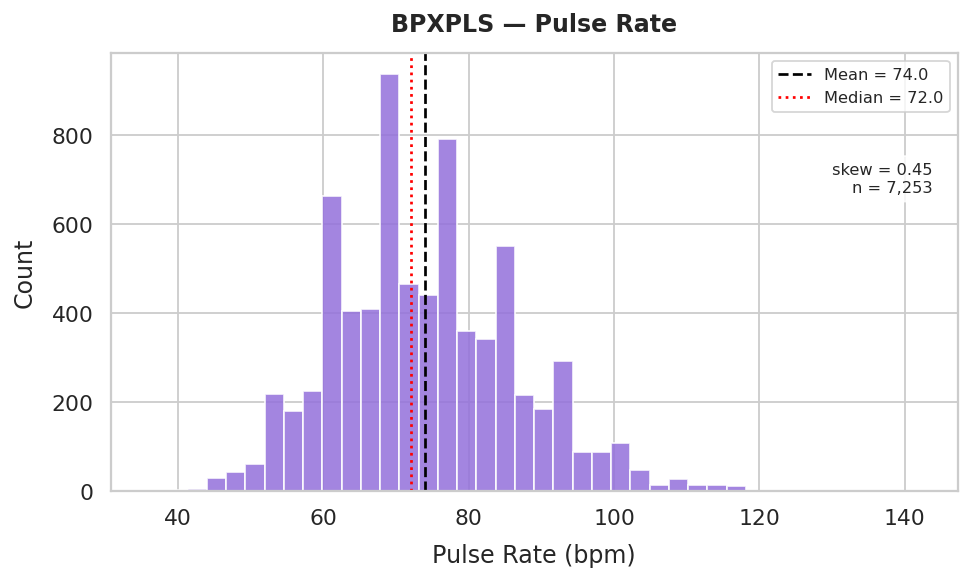

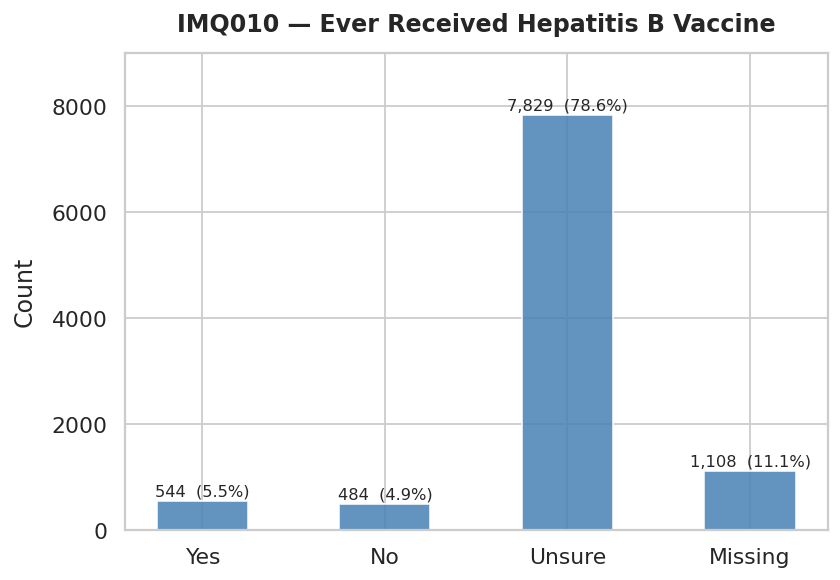

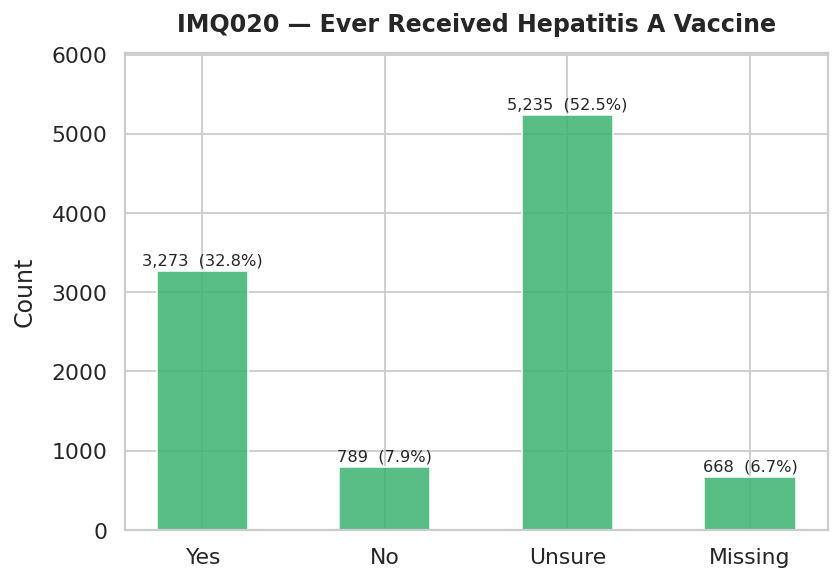

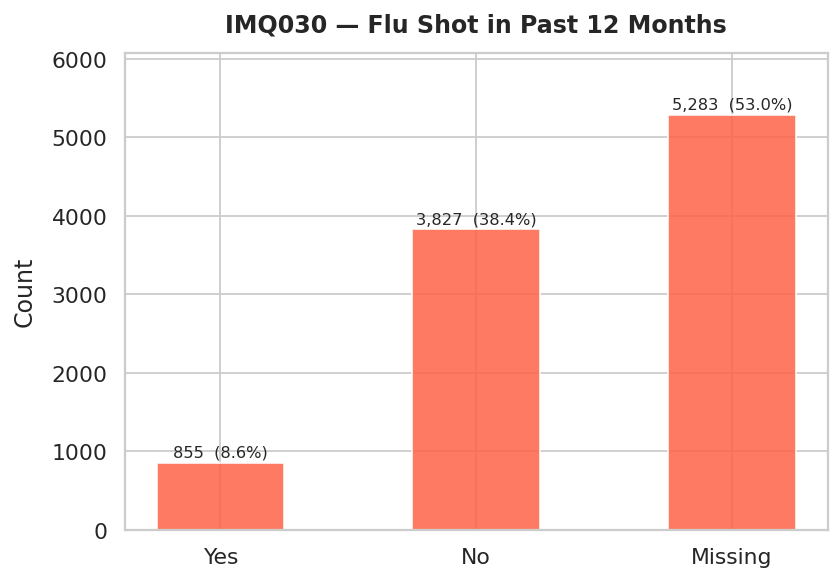

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style='whitegrid', font_scale=1.1)
plt.rcParams['figure.dpi'] = 130
np.random.seed(42)

bpx = pd.read_sas('BPX.xpt', format='xport')
imq = pd.read_sas('IMQ.xpt', format='xport')

imq['IMQ010'] = imq['IMQ010'].replace({7:np.nan, 9:np.nan})
imq['IMQ020'] = imq['IMQ020'].replace({7:np.nan, 9:np.nan})
imq['IMQ030'] = imq['IMQ030'].replace({7:np.nan, 9:np.nan})

# FIGURE 1: BPXSAR
fig, ax = plt.subplots(figsize=(8, 5))
data = bpx['BPXSAR'].dropna()
ax.hist(data, bins=40, color='steelblue', edgecolor='white', alpha=0.85)
ax.axvline(data.mean(),   color='black', linestyle='--', lw=1.5, label=f'Mean = {data.mean():.1f}')
ax.axvline(data.median(), color='red',   linestyle=':',  lw=1.5, label=f'Median = {data.median():.1f}')
ax.set_title('BPXSAR — Average Systolic Blood Pressure', fontweight='bold', pad=12)
ax.set_xlabel('Systolic BP (mmHg)', labelpad=8)
ax.set_ylabel('Count', labelpad=8)
ax.legend(fontsize=9, loc='upper right')
ax.text(0.97, 0.75, f'skew = {data.skew():.2f}\nn = {len(data):,}',
        transform=ax.transAxes, ha='right', va='top', fontsize=9,
        bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.8))
plt.tight_layout(pad=2.0)
plt.savefig('fig1_BPXSAR.png', bbox_inches='tight')
plt.show()

# FIGURE 2: BPXDAR
fig, ax = plt.subplots(figsize=(8, 5))
data = bpx['BPXDAR'].dropna()
ax.hist(data, bins=40, color='mediumseagreen', edgecolor='white', alpha=0.85)
ax.axvline(data.mean(),   color='black', linestyle='--', lw=1.5, label=f'Mean = {data.mean():.1f}')
ax.axvline(data.median(), color='red',   linestyle=':',  lw=1.5, label=f'Median = {data.median():.1f}')
ax.set_title('BPXDAR — Average Diastolic Blood Pressure', fontweight='bold', pad=12)
ax.set_xlabel('Diastolic BP (mmHg)', labelpad=8)
ax.set_ylabel('Count', labelpad=8)
ax.legend(fontsize=9, loc='upper right')
ax.text(0.97, 0.75, f'skew = {data.skew():.2f}\nn = {len(data):,}',
        transform=ax.transAxes, ha='right', va='top', fontsize=9,
        bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.8))
plt.tight_layout(pad=2.0)
plt.savefig('fig2_BPXDAR.png', bbox_inches='tight')
plt.show()

# FIGURE 3: BPXPLS
fig, ax = plt.subplots(figsize=(8, 5))
data = bpx['BPXPLS'].dropna()
ax.hist(data, bins=40, color='mediumpurple', edgecolor='white', alpha=0.85)
ax.axvline(data.mean(),   color='black', linestyle='--', lw=1.5, label=f'Mean = {data.mean():.1f}')
ax.axvline(data.median(), color='red',   linestyle=':',  lw=1.5, label=f'Median = {data.median():.1f}')
ax.set_title('BPXPLS — Pulse Rate', fontweight='bold', pad=12)
ax.set_xlabel('Pulse Rate (bpm)', labelpad=8)
ax.set_ylabel('Count', labelpad=8)
ax.legend(fontsize=9, loc='upper right')
ax.text(0.97, 0.75, f'skew = {data.skew():.2f}\nn = {len(data):,}',
        transform=ax.transAxes, ha='right', va='top', fontsize=9,
        bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.8))
plt.tight_layout(pad=2.0)
plt.savefig('fig3_BPXPLS.png', bbox_inches='tight')
plt.show()

# FIGURE 4: IMQ010
fig, ax = plt.subplots(figsize=(7, 5))
vc = imq['IMQ010'].value_counts(dropna=False).sort_index()
lmap = {1.0:'Yes', 2.0:'No', 3.0:'Unsure'}
tick_labels = [lmap.get(k, 'Missing') if not pd.isna(k) else 'Missing' for k in vc.index]
bars = ax.bar(tick_labels, vc.values, color='steelblue', edgecolor='white',
              alpha=0.85, width=0.5)
for bar, val in zip(bars, vc.values):
    ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+40,
            f'{val:,}  ({val/len(imq):.1%})', ha='center', va='bottom', fontsize=9)
ax.set_title('IMQ010 — Ever Received Hepatitis B Vaccine', fontweight='bold', pad=12)
ax.set_ylabel('Count', labelpad=8)
ax.set_ylim(0, vc.max() * 1.15)
plt.tight_layout(pad=2.0)
plt.savefig('fig4_IMQ010.png', bbox_inches='tight')
plt.show()

# FIGURE 5: IMQ020
fig, ax = plt.subplots(figsize=(7, 5))
vc = imq['IMQ020'].value_counts(dropna=False).sort_index()
tick_labels = [lmap.get(k, 'Missing') if not pd.isna(k) else 'Missing' for k in vc.index]
bars = ax.bar(tick_labels, vc.values, color='mediumseagreen', edgecolor='white',
              alpha=0.85, width=0.5)
for bar, val in zip(bars, vc.values):
    ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+40,
            f'{val:,}  ({val/len(imq):.1%})', ha='center', va='bottom', fontsize=9).
ax.set_title('IMQ020 — Ever Received Hepatitis A Vaccine', fontweight='bold', pad=12)
ax.set_ylabel('Count', labelpad=8)
ax.set_ylim(0, vc.max() * 1.15)
plt.tight_layout(pad=2.0)
plt.savefig('fig5_IMQ020.png', bbox_inches='tight')
plt.show()

# FIGURE 6: IMQ030
fig, ax = plt.subplots(figsize=(7, 5))
vc = imq['IMQ030'].value_counts(dropna=False).sort_index()
flu_lmap = {1.0:'Yes', 2.0:'No'}
tick_labels = [flu_lmap.get(k, 'Missing') if not pd.isna(k) else 'Missing' for k in vc.index]
bars = ax.bar(tick_labels, vc.values, color='tomato', edgecolor='white',
              alpha=0.85, width=0.5)
for bar, val in zip(bars, vc.values):
    ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+40,
            f'{val:,}  ({val/len(imq):.1%})', ha='center', va='bottom', fontsize=9)
ax.set_title('IMQ030 — Flu Shot in Past 12 Months', fontweight='bold', pad=12)
ax.set_ylabel('Count', labelpad=8)
ax.set_ylim(0, vc.max() * 1.15)
plt.tight_layout(pad=2.0)
plt.savefig('fig6_IMQ030.png', bbox_inches='tight')
plt.show()